### Importing Libraries

In [2]:
import pandas as pd #basic data operations 
import numpy as np
import re #for using regex functions
import seaborn as sns
import matplotlib.pyplot as plt # for visualization of data
from matplotlib import style   # to set style for the plots
style.use('ggplot') # ggplot is used here 
from sklearn.feature_extraction.text import CountVectorizer #to vectorize the text document
from sklearn.model_selection import train_test_split #to train the texting data
from sklearn.linear_model import LogisticRegression #to perform logistic regression on the data

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay  #different evaluation model for evaluation
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")

In [3]:
text_df = pd.read_csv('TSA-Preprocessing-dropped.csv')  #to load the data
text_df = text_df.sample(n=50000,replace=False)

In [4]:
text_df.head() 

,text,polarity,sentiment
40623,tired cant sleep moderna,-0.4,Negative
28266,vp chiwenga ministers witness arrival second b...,0.0,Neutral
181154,pincode 560103 covaxin dose 2 100 slots age 18...,0.0,Neutral
78552,doctor hello happening taste food ive got rash...,0.0,Neutral
100766,today received 2nd booster shot covaxin,0.0,Neutral


In [5]:
text_df

,text,polarity,sentiment
40623,tired cant sleep moderna,-0.40,Negative
28266,vp chiwenga ministers witness arrival second b...,0.00,Neutral
181154,pincode 560103 covaxin dose 2 100 slots age 18...,0.00,Neutral
78552,doctor hello happening taste food ive got rash...,0.00,Neutral
100766,today received 2nd booster shot covaxin,0.00,Neutral
...,...,...,...
40805,moderna twodose vaccine available cvs pharmacy...,0.40,Positive
210567,thehill many booster shots willing 2 take aski...,0.25,Positive
134430,prateek09201779 sandhya24908020 jpnadda come h...,0.50,Positive
56551,shortage vaccines people doubting covaxin vacc...,0.00,Neutral


### Count-Vectorization 


In [6]:
vect = CountVectorizer().fit(text_df['text'])

### Creating the Unigram Model

In [7]:
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (40000, 49602)
Size of y_train: (40000,)
Size of x_test: (10000, 49602)
Size of y_test: (10000,)


# Applying Models

# Logistic Regression

In [9]:
logreg = LogisticRegression()
logreg_model = logreg.fit(x_train, y_train)
logreg_pred = logreg_model.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 95.28%


In [10]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 728  164   75]
 [   8 5655   12]
 [  47  166 3145]]


              precision    recall  f1-score   support

    Negative       0.93      0.75      0.83       967
     Neutral       0.94      1.00      0.97      5675
    Positive       0.97      0.94      0.95      3358

    accuracy                           0.95     10000
   macro avg       0.95      0.90      0.92     10000
weighted avg       0.95      0.95      0.95     10000



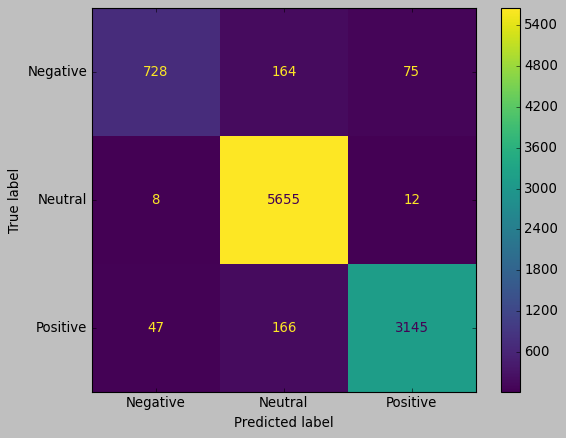

In [11]:
style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()

# Naive Bayes

In [12]:
nb = MultinomialNB(alpha=1.0,fit_prior=True,class_prior=None)

nb_model = nb.fit(x_train, y_train)

nb_pred = nb_model.predict(x_test)

print("Test Accuracy: ", round(accuracy_score(y_test, nb_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, nb_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, nb_pred))

Test Accuracy:  76.06 %


[[ 395  114  458]
 [ 278 4003 1394]
 [  55   95 3208]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.54      0.41      0.47       967
     Neutral       0.95      0.71      0.81      5675
    Positive       0.63      0.96      0.76      3358

    accuracy                           0.76     10000
   macro avg       0.71      0.69      0.68     10000
weighted avg       0.80      0.76      0.76     10000



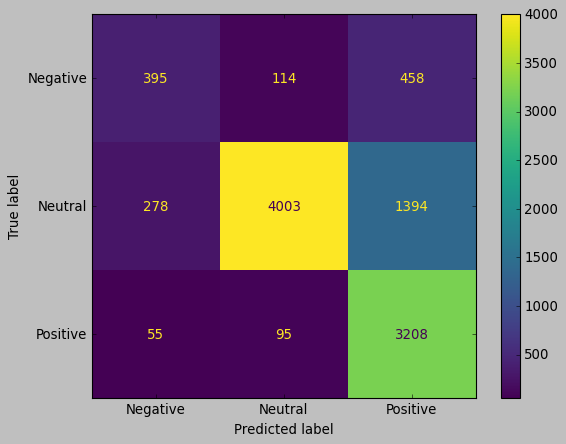

In [13]:
style.use('classic')
cm = confusion_matrix(y_test, nb_pred, labels=nb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=nb.classes_)
disp.plot()

# SVM

In [11]:
# Train an SVM classifier on the training set
clf = LinearSVC(kernel = 3)
sv_model = clf.fit(x_train, y_train)

# Evaluate the model's performance on the testing set
sv_pred = sv_model.predict(x_test)
print("Test Accuracy:", round(accuracy_score(y_test, sv_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, sv_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, sv_pred))

TypeError: __init__() got an unexpected keyword argument 'kernel'

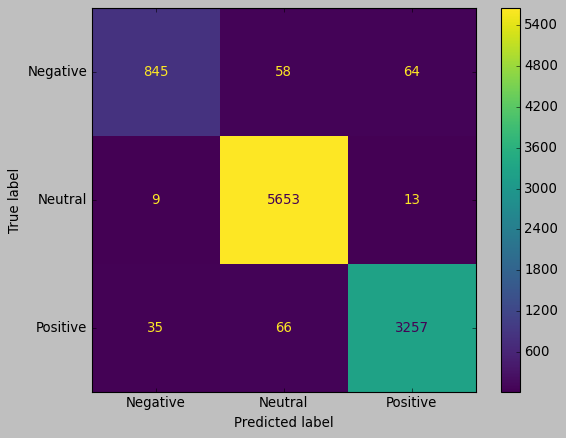

In [15]:
style.use('classic')
cm = confusion_matrix(y_test, sv_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=clf.classes_)
disp.plot()

# KNN

In [16]:
kn = KNeighborsClassifier(n_neighbors=3)

kn_model = kn.fit(x_train, y_train)

kn_pred = kn_model.predict(x_test)

print("Test Accuracy: ", round(accuracy_score(y_test, kn_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, kn_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, kn_pred,))

Test Accuracy:  68.43 %


[[ 132  809   26]
 [  24 5549  102]
 [  24 2172 1162]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.73      0.14      0.23       967
     Neutral       0.65      0.98      0.78      5675
    Positive       0.90      0.35      0.50      3358

    accuracy                           0.68     10000
   macro avg       0.76      0.49      0.50     10000
weighted avg       0.74      0.68      0.63     10000



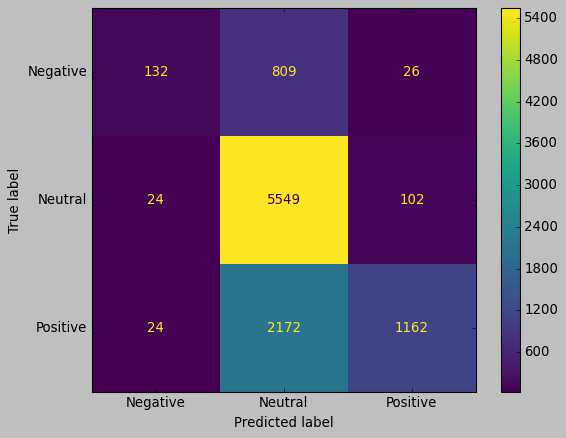

In [17]:
style.use('classic')
cm = confusion_matrix(y_test, kn_pred, labels=kn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=kn.classes_)
disp.plot()

# Decision Tree

In [18]:
dtc = DecisionTreeClassifier(criterion= 'entropy',max_depth = 50, splitter='best', random_state=100)
dtc_model = dtc.fit(x_train, y_train)

dtc_pred = dtc_model.predict(x_test)

print("Test Accuracy: ", round(accuracy_score(y_test, dtc_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, dtc_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, dtc_pred))

Test Accuracy:  84.22 %


[[ 364  513   90]
 [   5 5664    6]
 [  63  901 2394]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.84      0.38      0.52       967
     Neutral       0.80      1.00      0.89      5675
    Positive       0.96      0.71      0.82      3358

    accuracy                           0.84     10000
   macro avg       0.87      0.70      0.74     10000
weighted avg       0.86      0.84      0.83     10000



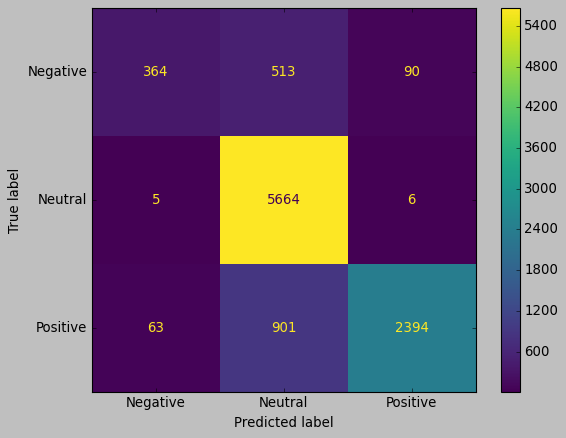

In [19]:
style.use('classic')
cm = confusion_matrix(y_test, dtc_pred, labels=dtc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=dtc.classes_)
disp.plot()

# Random Forest

In [20]:
rf = RandomForestClassifier(max_depth = 2000, random_state=42,n_estimators=100,criterion="entropy")

# Train the model on the training set
rf_model = rf.fit(x_train, y_train)

In [21]:
# Make predictions on the test set
rf_pred = rf.predict(x_test)

print("Test accuracy:", round(accuracy_score(y_test, rf_pred)*100,2), "\b%")
print("\n")
print(confusion_matrix(y_test, rf_pred))
print("\n")
print("Classification Report:\n\n", classification_report(y_test, rf_pred))

Test accuracy: 93.42 %


[[ 658  206  103]
 [  12 5652   11]
 [  31  295 3032]]


Classification Report:

               precision    recall  f1-score   support

    Negative       0.94      0.68      0.79       967
     Neutral       0.92      1.00      0.96      5675
    Positive       0.96      0.90      0.93      3358

    accuracy                           0.93     10000
   macro avg       0.94      0.86      0.89     10000
weighted avg       0.94      0.93      0.93     10000



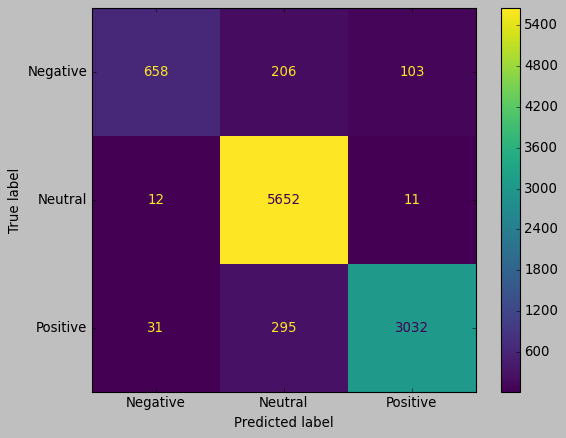

In [22]:
style.use('classic')
cm = confusion_matrix(y_test, rf_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=rf.classes_)
disp.plot()

#  Store the model names and their accuracy in a dataframe

In [23]:
res = []
res = pd.DataFrame(res)
res["models"] = ["Logistic Regression", "Naive Bayes","SVM",  "KNN", "Decision Tree", "Random Forest"]
res["accuracy"] = [ round(accuracy_score(y_test, logreg_pred)*100,2),round(accuracy_score(y_test, nb_pred)*100,2),round(accuracy_score(y_test, sv_pred)*100,2), round(accuracy_score(y_test, kn_pred)*100,2), round(accuracy_score(y_test, dtc_pred)*100,2), round(accuracy_score(y_test, rf_pred)*100,2)]
res = res.sort_values("accuracy", ascending=False).reset_index(drop=True)
res.to_csv('model_results_50k.csv', index=False)
res

,models,accuracy
0,SVM,97.55
1,Logistic Regression,95.28
2,Random Forest,93.42
3,Decision Tree,84.22
4,Naive Bayes,76.06
5,KNN,68.43


#  Save the traied models locally

In [24]:
import joblib

joblib.dump(logreg_model, 'Trained Models_50k/logregr_model.pkl')
joblib.dump(nb_model, 'Trained Models_50k/nb_model.pkl')
joblib.dump(sv_model, 'Trained Models_50k/svm_model.pkl')
joblib.dump(kn_model, 'Trained Models_50k/kn_model.pkl')
joblib.dump(dtc_model, 'Trained Models_50k/dtc_model.pkl')
joblib.dump(rf_model, 'Trained Models_50k/rf_model.pkl')

['Trained Models_50k/rf_model.pkl']